In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
#get data 
df_mobile = pd.read_excel('data_mobile.xlsx', 'Conjunto de datos1')
df_mobile[df_mobile['Usuarios'] > 0]
df_mobile.columns = ['Fecha', 'TotalUsuarios']
df = df_mobile[df_mobile['TotalUsuarios'] > 0]
#help(df.drop)
df.drop(index = df.index[-1:], axis = 0, inplace = True)
df.head()
print(df.shape)
df[-1:]


(509, 2)


/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Fecha,TotalUsuarios
737,2019-02-14,1015


(509, 2)
       TotalUsuarios
count     509.000000
mean     1862.990177
std      1394.458625
min         1.000000
25%         7.000000
50%      2146.000000
75%      2901.000000
max      4630.000000


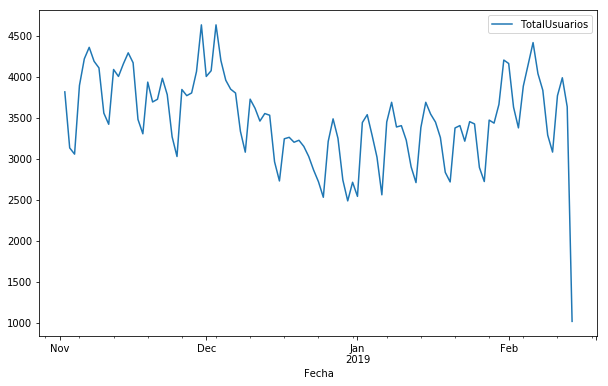

In [96]:
#study data
print(df.shape)
print(df.describe())

#plot data
#df.plot(kind = 'line', x = 'Fecha', y = 'TotalUsuarios', figsize = (14, 7))

#get max interaction
df[df['TotalUsuarios'] == df['TotalUsuarios'].max()]

#get min interaction
#df[df['TotalUsuarios'] == df['TotalUsuarios'].min()]
df_sample = df[df['Fecha'] > '2018-11-01']
df_sample.plot(kind = 'line', x = 'Fecha', y = 'TotalUsuarios', figsize= (10,6))

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


02/11/2018
Text(0,0,'')
Text(0,0,'')
Text(0,0,'')
Text(0,0,'')
Text(0,0,'')
Text(0,0,'')
Text(0,0,'')
 beta_1 = 1.000000, beta_2 = 1.000000


/home/tania/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


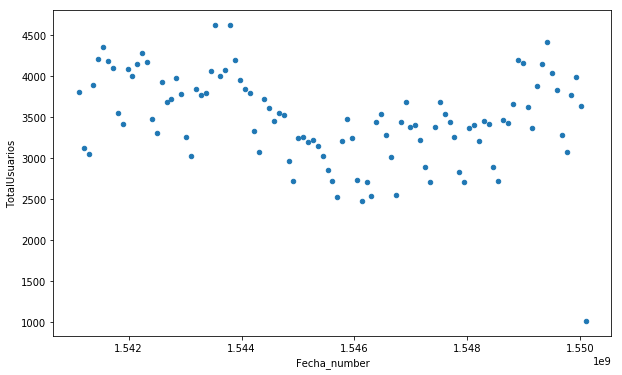

In [218]:
#determine what model to use
#check correlation if correlation > 0.7 = linear regression

#df_sample['Fecha'].corr(df_sample['TotalUsuarios']) #error cause: dtype
import time
import numpy as np
#list_ms = pd.Timestamp(df_sample.loc[:,'Fecha'].to_string(index = False), is_year_start = True)
#list_ms = pd.to_timedelta(df['Fecha']).dt.total_seconds()

 #help(pd.Timestamp)
df_sample['Fecha_string']  = df['Fecha'].dt.strftime('%d/%m/%Y')
df_sample['Fecha_number']  = pd.to_timedelta(df['Fecha']).dt.total_seconds()
#df_sample.drop(['Miliseconds'], axis = 1, inplace = True)
df_sample.head()
#print(list_ms)
#print(type(list_ms))
#df_sample['Miliseconds'] = time.mktime(list_ms).timetuple())
#df_sample
#df_sample.loc[:,'Fecha'].to_string(index = False)
plot = df_sample.plot(kind = 'scatter', x = 'Fecha_number', y = 'TotalUsuarios', figsize = (10, 6))
#plot.xlabel = pd['Fecha'].aslist()
#check correlation
df_sample.index.name = 'Hola'
df_sample['TotalUsuarios'].corr(df_sample['Fecha_number'])
#df_sample['Fecha_number'].index.names  = 
#list(map(str, df_sample['Fecha_string']))
#df_sample.head()
#lista =  np.array_split(list(map(str, df_sample['Fecha_string'])),5)[0:1]
print(df_sample.loc[633,'Fecha_string'])
lista = list({'Oct', 'Nov', 'Dic', 'En', 'Feb'})
#plot.set_xticklabels('','','','','')
#print(plot.get_xticklabels)
labels = plot.get_xticklabels()
for label in labels:
    print(label)


 beta_1 = 1.000000, beta_2 = 1.000000


/home/tania/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


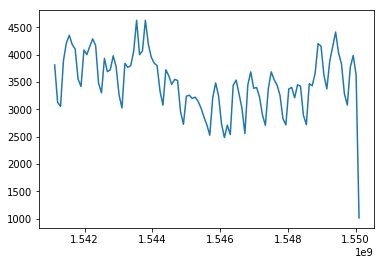

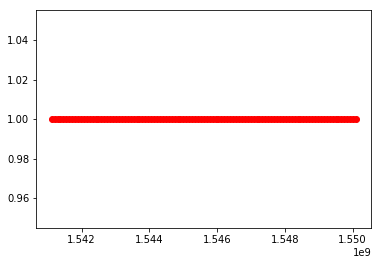

Mean absolute error: 3481.63
Residual sum of squares (MSE): 12420942.85
R2-score: 0.00


In [236]:

from scipy.optimize import curve_fit
xdata = df_sample['Fecha_number']
ydata = df_sample['TotalUsuarios']
y_delta = 1 / (1 + np.exp( - xdata))
#print(xdata, y_delta)

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y


popt, pcov = curve_fit(sigmoid, xdata, y_delta)

#plt.plot(xdata, sigmoid, c = 'r')
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
plt.plot(xdata, ydata)
plt.show()
plt.plot(xdata, y_delta, 'ro')
plt.show()

#y_delta = sigmoid(xdata, popt[0], popt[1] )

#see error
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_delta - ydata)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_delta - ydata) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_delta , ydata) )

#CONCLUSION: IS NOT GOO IDEA SET SIGMOID TO PREDICT